In [1]:
#THis jup notebook generates PCA, tSNE and UMAP plots
#from Eigenvectors that are calculated by plink using vcf's
#The goal was to compare them to the results of genotype_dimred_demo.jupnotebook
#In the end they were similar. So for our project we could start from either vcf files, or eigenvectors (or cov matrices from beagle)

# Import libraries. 
# Generate images in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import collections
from collections import defaultdict
import gzip
import itertools
import numpy as np
import os
import time
import seaborn as sns
import pandas as pd

from ipywidgets import interact
import bokeh
import bokeh.io
from bokeh.io import push_notebook
from bokeh.plotting import figure, show, save, output_notebook, output_file

# Import colour palettes for later on
from bokeh.palettes import Category20b
from bokeh.palettes import Purples
from bokeh.palettes import Greens
from bokeh.palettes import YlOrBr
from bokeh.palettes import YlOrRd
from bokeh.palettes import PuOr
from bokeh.palettes import RdGy

# Dimension reduction tools
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE
import umap 

In [2]:
#eigenvec_deneme=pd.read_csv('deneme1.eigenvec',sep='\t', header=None)
eigenvec_deneme= pd.read_excel(r'deneme_eigenvect.xls')
print(eigenvec_deneme.head())


      test  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0  HG00096   -0.010769    0.022522    0.004795   -0.018459    0.000526   
1  HG00097   -0.010646    0.022902    0.004535   -0.017230   -0.001001   
2  HG00098   -0.011045    0.022610    0.004296   -0.017018    0.000222   
3  HG00099   -0.010847    0.022832    0.005469   -0.017232    0.002226   
4  HG00100   -0.010551    0.022828    0.004627   -0.016707    0.001292   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 11  \
0    0.006716   -0.006263   -0.012351   -0.003829  ...    -0.000857   
1    0.006963   -0.004617   -0.011722   -0.004281  ...    -0.000110   
2    0.007212   -0.006212   -0.013691   -0.000866  ...     0.000947   
3    0.010825   -0.008588   -0.015685   -0.001749  ...    -0.001572   
4    0.005946   -0.004164   -0.010869    0.001341  ...     0.000815   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0     0.000387     0.000997     0.001236    -0.001737     

In [7]:
eigenvals=pd.read_csv('deneme1.eigenval',sep='\t', header=None)


In [5]:
Data_Struct=pd.DataFrame()
Data_Struct["Individual_ID"] = eigenvec_deneme.iloc[:, 0]
num_eigenvect = 20
for i in range(num_eigenvect):
    col_name = f"Eigenvect{i + 1}"
    Data_Struct[col_name] = eigenvec_deneme.iloc[:, i + 1]

print(Data_Struct.head())

  Individual_ID  Eigenvect1  Eigenvect2  Eigenvect3  Eigenvect4  Eigenvect5  \
0       HG00096   -0.010769    0.022522    0.004795   -0.018459    0.000526   
1       HG00097   -0.010646    0.022902    0.004535   -0.017230   -0.001001   
2       HG00098   -0.011045    0.022610    0.004296   -0.017018    0.000222   
3       HG00099   -0.010847    0.022832    0.005469   -0.017232    0.002226   
4       HG00100   -0.010551    0.022828    0.004627   -0.016707    0.001292   

   Eigenvect6  Eigenvect7  Eigenvect8  Eigenvect9  ...  Eigenvect11  \
0    0.006716   -0.006263   -0.012351   -0.003829  ...    -0.000857   
1    0.006963   -0.004617   -0.011722   -0.004281  ...    -0.000110   
2    0.007212   -0.006212   -0.013691   -0.000866  ...     0.000947   
3    0.010825   -0.008588   -0.015685   -0.001749  ...    -0.001572   
4    0.005946   -0.004164   -0.010869    0.001341  ...     0.000815   

   Eigenvect12  Eigenvect13  Eigenvect14  Eigenvect15  Eigenvect16  \
0     0.000387     0.000997 

In [8]:
Data_Struct_Plot = Data_Struct.iloc[:, :3]
Data_Struct_Plot['wEigenvect1'] = Data_Struct_Plot['Eigenvect1'] * eigenvals[0][0]
Data_Struct_Plot['wEigenvect2'] = Data_Struct_Plot['Eigenvect2'] * eigenvals[0][1]
print(Data_Struct_Plot)


     Individual_ID  Eigenvect1  Eigenvect2  wEigenvect1  wEigenvect2
0          HG00096   -0.010769    0.022522    -3.961084     2.835770
1          HG00097   -0.010646    0.022902    -3.915806     2.883591
2          HG00098   -0.011045    0.022610    -4.062675     2.846888
3          HG00099   -0.010847    0.022832    -3.989774     2.874765
4          HG00100   -0.010551    0.022828    -3.880679     2.874211
...            ...         ...         ...          ...          ...
3445       NA21137   -0.010033    0.005734    -3.690261     0.721915
3446       NA21141   -0.010066    0.005432    -3.702546     0.683993
3447       NA21142   -0.010218    0.005055    -3.758197     0.636436
3448       NA21143   -0.010197    0.004992    -3.750804     0.628506
3449       NA21144   -0.009887    0.004942    -3.636589     0.622303

[3450 rows x 5 columns]


In [9]:
for i in range(20):
    col_name = f'wEigenvect{i + 1}'
    Data_Struct[col_name] = Data_Struct[f'Eigenvect{i + 1}'] * eigenvals[0][i]
#print(Data_Struct)

[Text(0.5, 1.0, 'wPCA 1 vs 2')]

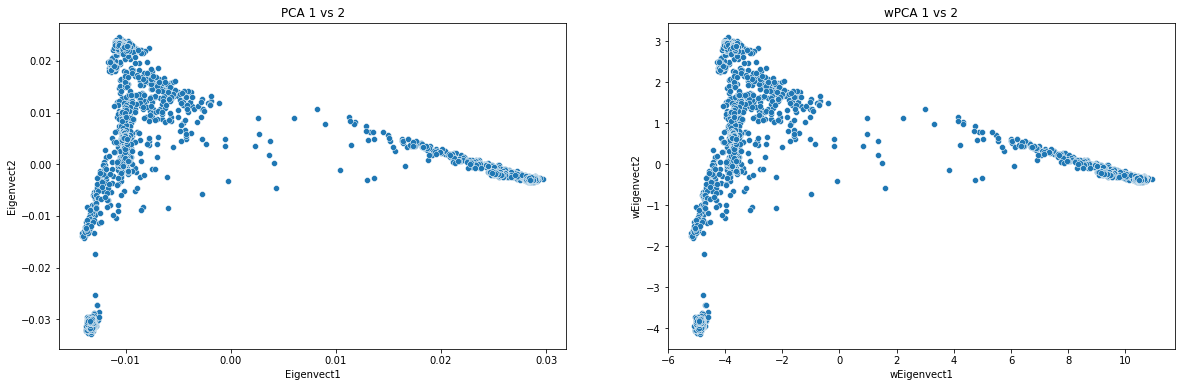

In [11]:
fig, axs = plt.subplots(1, 2,figsize=(20, 6))

sns.scatterplot(ax=axs[0],data=Data_Struct_Plot, x='Eigenvect1', y='Eigenvect2',legend = False).set(title='PCA 1 vs 2')
sns.scatterplot(ax=axs[1],data=Data_Struct_Plot, x='wEigenvect1', y='wEigenvect2',legend = False).set(title='wPCA 1 vs 2')


In [16]:
EigVects = Data_Struct.iloc[:, 1:21]
#print(EigVects)

EigVects_array = EigVects.values
#print(EigVects_array)

In [20]:
EigVectsW = Data_Struct.iloc[:, 21:41]
#print(EigVectsW)

EigVectsW_array = EigVectsW.values
#print(EigVects_array)

In [21]:
# Number of principal components to use
n_pc = 15
n_neighbors_num=15
mindist=0.5

In [24]:
# Project the eigenvectors via t-SNE to 2 dimensions.
np.random.seed(111)
proj_tsne_eig = TSNE(n_components=2).fit_transform(EigVects_array[:,:n_pc])

# Project the eigenvectors via UMAPto 2 dimensions.
np.random.seed(111)
proj_umap_eig = umap.UMAP(n_components=2, n_neighbors=n_neighbors_num, min_dist=mindist).fit_transform(EigVects_array[:,:n_pc])

# Project the eigenvectors*eigenvalues via t-SNE to 2 dimensions.
np.random.seed(111)
proj_tsne_eigvecval = TSNE(n_components=2).fit_transform(EigVectsW_array[:,:n_pc])

# Project the eigenvectors via UMAPto 2 dimensions.
np.random.seed(111)
proj_umap_eigvecval = umap.UMAP(n_components=2, n_neighbors=n_neighbors_num, min_dist=mindist).fit_transform(EigVectsW_array[:,:n_pc])

/Users/kuzel/anaconda3/envs/beyondpca/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kuzel/anaconda3/envs/beyondpca/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/kuzel/anaconda3/envs/beyondpca/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kuzel/anaconda3/envs/beyondpca/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [25]:
Data_Struct['tSNE1']=proj_tsne_eig[:,0]
Data_Struct['tSNE2']=proj_tsne_eig[:,1]

Data_Struct['tSNE1_multip']=proj_tsne_eigvecval[:,0]
Data_Struct['tSNE2_multip']=proj_tsne_eigvecval[:,1]

Data_Struct['UMAP1']=proj_umap_eig[:,0]
Data_Struct['UMAP2']=proj_umap_eig[:,1]

Data_Struct['UMAP1_multip']=proj_umap_eigvecval[:,0]
Data_Struct['UMAP2_multip']=proj_umap_eigvecval[:,1]

In [27]:
print(Data_Struct.head())

  Individual_ID  Eigenvect1  Eigenvect2  Eigenvect3  Eigenvect4  Eigenvect5  \
0       HG00096   -0.010769    0.022522    0.004795   -0.018459    0.000526   
1       HG00097   -0.010646    0.022902    0.004535   -0.017230   -0.001001   
2       HG00098   -0.011045    0.022610    0.004296   -0.017018    0.000222   
3       HG00099   -0.010847    0.022832    0.005469   -0.017232    0.002226   
4       HG00100   -0.010551    0.022828    0.004627   -0.016707    0.001292   

   Eigenvect6  Eigenvect7  Eigenvect8  Eigenvect9  ...  wEigenvect19  \
0    0.006716   -0.006263   -0.012351   -0.003829  ...     -0.002349   
1    0.006963   -0.004617   -0.011722   -0.004281  ...     -0.008376   
2    0.007212   -0.006212   -0.013691   -0.000866  ...     -0.007732   
3    0.010825   -0.008588   -0.015685   -0.001749  ...     -0.000497   
4    0.005946   -0.004164   -0.010869    0.001341  ...     -0.005949   

   wEigenvect20     tSNE1      tSNE2  tSNE1_multip  tSNE2_multip     UMAP1  \
0      0.01321

[Text(0.5, 1.0, 'UMAP from wPCA (Top 15 PCs)')]

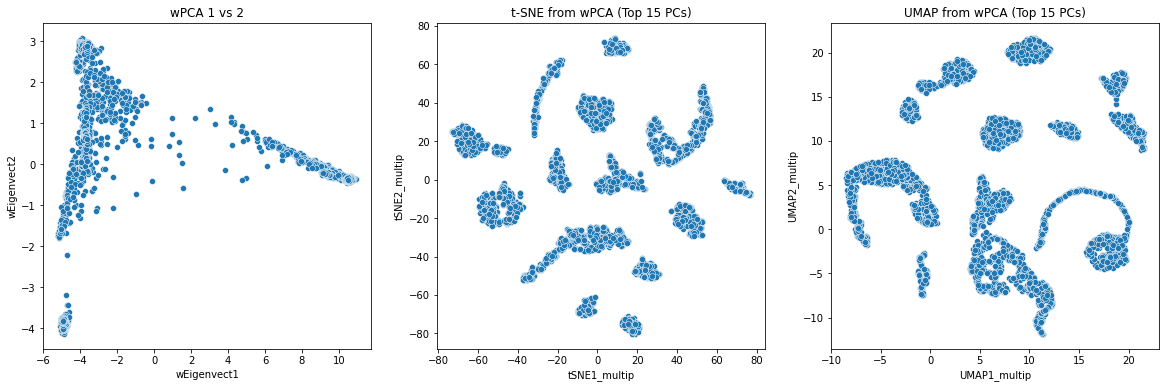

In [28]:
fig, axs = plt.subplots(1, 3,figsize=(20, 6))

#axs[1,1] = Data_Struct.plot.scatter(x='X1',y='X2',c='Population')
sns.scatterplot(ax=axs[0],data=Data_Struct, x='wEigenvect1', y='wEigenvect2',legend = False).set(title='wPCA 1 vs 2')
sns.scatterplot(ax=axs[1],data=Data_Struct, x='tSNE1_multip', y='tSNE2_multip',legend = False).set(title='t-SNE from wPCA (Top 15 PCs)')
sns.scatterplot(ax=axs[2],data=Data_Struct, x='UMAP1_multip', y='UMAP2_multip').set(title='UMAP from wPCA (Top 15 PCs)')
#for i in range(1,143):
#    plt.text(x=Data_Struct['UMAP1_multip'][i]+0.05, y=Data_Struct['UMAP2_multip'][i],s=Data_Struct['Sample'][i])
    

[Text(0.5, 1.0, 'UMAP from PCA (Top 15 PCs)')]

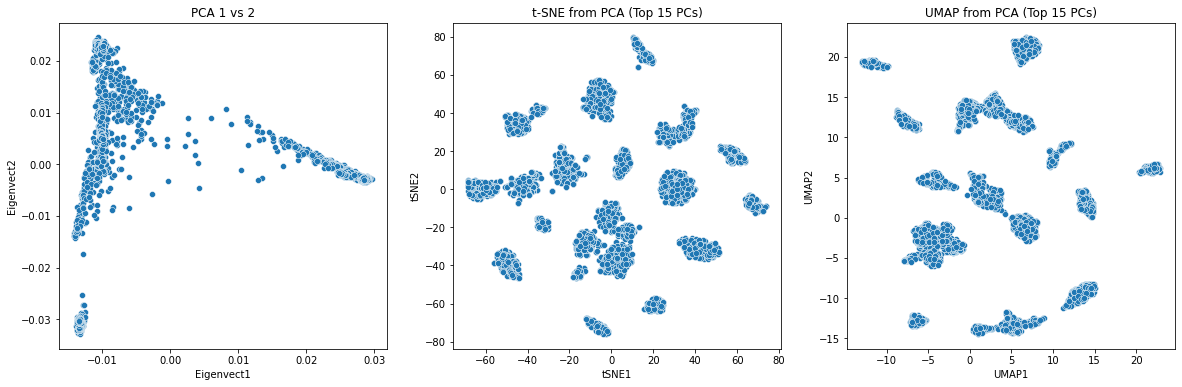

In [29]:
fig, axs = plt.subplots(1, 3,figsize=(20, 6))

#axs[1,1] = Data_Struct.plot.scatter(x='X1',y='X2',c='Population')
sns.scatterplot(ax=axs[0],data=Data_Struct, x='Eigenvect1', y='Eigenvect2',legend = False).set(title='PCA 1 vs 2')
sns.scatterplot(ax=axs[1],data=Data_Struct, x='tSNE1', y='tSNE2',legend = False).set(title='t-SNE from PCA (Top 15 PCs)')
sns.scatterplot(ax=axs[2],data=Data_Struct, x='UMAP1', y='UMAP2').set(title='UMAP from PCA (Top 15 PCs)')
#for i in range(1,143):
#    plt.text(x=Data_Struct['UMAP1_multip'][i]+0.05, y=Data_Struct['UMAP2_multip'][i],s=Data_Struct['Sample'][i])
    

In [36]:
data_dir = '/Users/kuzel/Beyond/DimRedTut/'

vcf_name = 'ALL.wgs.nhgri_coriell_affy_6.20140825.genotypes_has_ped.vcf.gz'
pop_desc_name = '20131219.populations.tsv'
pop_file_name = 'affy_samples.20141118.panel'

In [37]:
vcf_file = os.path.join(data_dir, vcf_name)

population_description_file = os.path.join(data_dir, pop_desc_name)
population_file = os.path.join(data_dir, pop_file_name)

In [38]:
#The following code imports auxiliary data (populations, continent, descriptive data, colouring, etc.)
population_by_individual = defaultdict(int)
individuals_by_population = defaultdict(list)  # A dictionary containing all the individuals in a given population

for line in open(population_file,'r'):
    split_line = line.split()
    if split_line[0] == 'sample':  # header line
        continue

    sample_name = split_line[0]
    population_name = split_line[1]
    population_by_individual[sample_name] = population_name
    individuals_by_population[population_name].append(sample_name) 

populations = list(individuals_by_population.keys())

In [39]:
# The path to the place where you put the population name file.
name_by_code = {}  # A dictionary giving the full name of each population code
pop_by_continent = {}  # A dictionary giving the code of each population within a continent  
continent_by_population = {}  # A dictionary giving the continent for each population code
for line in open(population_description_file,'r'):
    split_line = line.split('\t')
    if split_line[0] in ['Population Description','Total','']:  # header or footer
        continue
    name_by_code[split_line[1]] = split_line[0]
    continent_by_population[split_line[1]] = split_line[2]
    try: 
        pop_by_continent[split_line[2]].append(split_line[1])
    except KeyError:
        pop_by_continent[split_line[2]] = [split_line[1]]

continents = list(pop_by_continent.keys()) 
    
    
# Populations listed by continent
pops=[]
for continent in continents:
    pops.extend(pop_by_continent[continent])

In [40]:
# Assign colours to each population, roughly themed according to continent
# The Category20b palette has a bunch of groups of 4 shades in the same colour range
color_dict = {}
for i, cont in enumerate(continents): 
    for j, pop in enumerate(pop_by_continent[cont]):
        color_dict[pop] = Category20b[20][4*i+j%4]

# Colour palette above only really supports groups of 4 so we have to manually specify a few colours for the 5th/6th
# members of a group

color_dict['CHS'] = Purples[9][4]# purple
color_dict['STU'] = Greens[9][6] # green
color_dict['LWK'] = PuOr[11][-1] # brown
color_dict['MSL'] = PuOr[11][-2] # rusty brown
color_dict['YRI'] = PuOr[11][-3] # cappucino w/ extra milk (stirred)
color_dict['CEU'] = RdGy[11][-3]

In [41]:
for line in gzip.open(vcf_file,'rt'):
    if line.startswith("#"):
        if not line.startswith("##"):
            # Extract the individuals for the population, as a list of strings
            # Windows users may have trailing \n characters
            individuals = line.split()[9:]
            # Once we've extracted the individuals, we can exit the loops. 
            break

# Build a list of populations for each indiviudal in the vcf file
lspop = []
for ind in individuals:
    pop = population_by_individual[ind]
    if pop == 0:
        lspop.append("missing")
    else:
        lspop.append(pop)

        
indices_of_population_members = defaultdict(list)

for index,individual in enumerate(individuals):
    try:
        indices_of_population_members[population_by_individual[individual]].append(index)
    except KeyError: # We do not have population info for this individual
        continue

In [42]:
count = 0

for p in pop_by_continent:
    count+=len(pop_by_continent[p])
    
print(count)

26


In [43]:
imax = 0
imin = 200
for i in indices_of_population_members:
    imax = max(len(indices_of_population_members[i]),imax)
    imin = min(len(indices_of_population_members[i]),imin)
    
print(imax, imin)

183 104


In [54]:
#selected_columns = Data_Struct[["UMAP1", "UMAP2"]].values
selected_columns = Data_Struct[["tSNE1", "tSNE2"]].values
#selected_columns = Data_Struct[["tSNE1", "tSNE2"]].values


print(selected_columns)

[[ -7.002858   55.567303 ]
 [ -6.9966555  55.46455  ]
 [ -9.5614195  45.135544 ]
 ...
 [  9.322057  -21.815641 ]
 [  9.390913  -24.55728  ]
 [  7.2635064 -20.758167 ]]


In [56]:
#Generate interactive HTML files

# Use the PCA projection
dset = selected_columns

# Select the dimensions in the projection
dim1 = 0
dim2 = 1

p = figure(plot_width=1350, plot_height=800)
p.title.text = 'PCA projection: PC' + str(dim1+1) + ' vs PC' + str(dim2+1)

for cont in continents: 
    for pop in pop_by_continent[cont]:
        projections_within_population = dset[indices_of_population_members[pop]]
        p.circle(projections_within_population[:,dim1], projections_within_population[:,dim2], 
                 legend=name_by_code[pop], color = color_dict[pop])

p.legend.location = "top_left"
p.legend.click_policy="hide"

output_file("bizim_from_Eigvectplink_tsne.html", title="bizim tsne projection")

save(p)
show(p)
